In [4]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [6]:
#df = pd.read_csv('../input/clothessizeprediction/final_test.csv')
df = pd.read_csv('final_test.csv')
df.shape

(119734, 4)

In [7]:
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

# **Dropping NaN values**

In [8]:
df.dropna(how='any', inplace=True)
df.shape

(119153, 4)

In [9]:
df.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

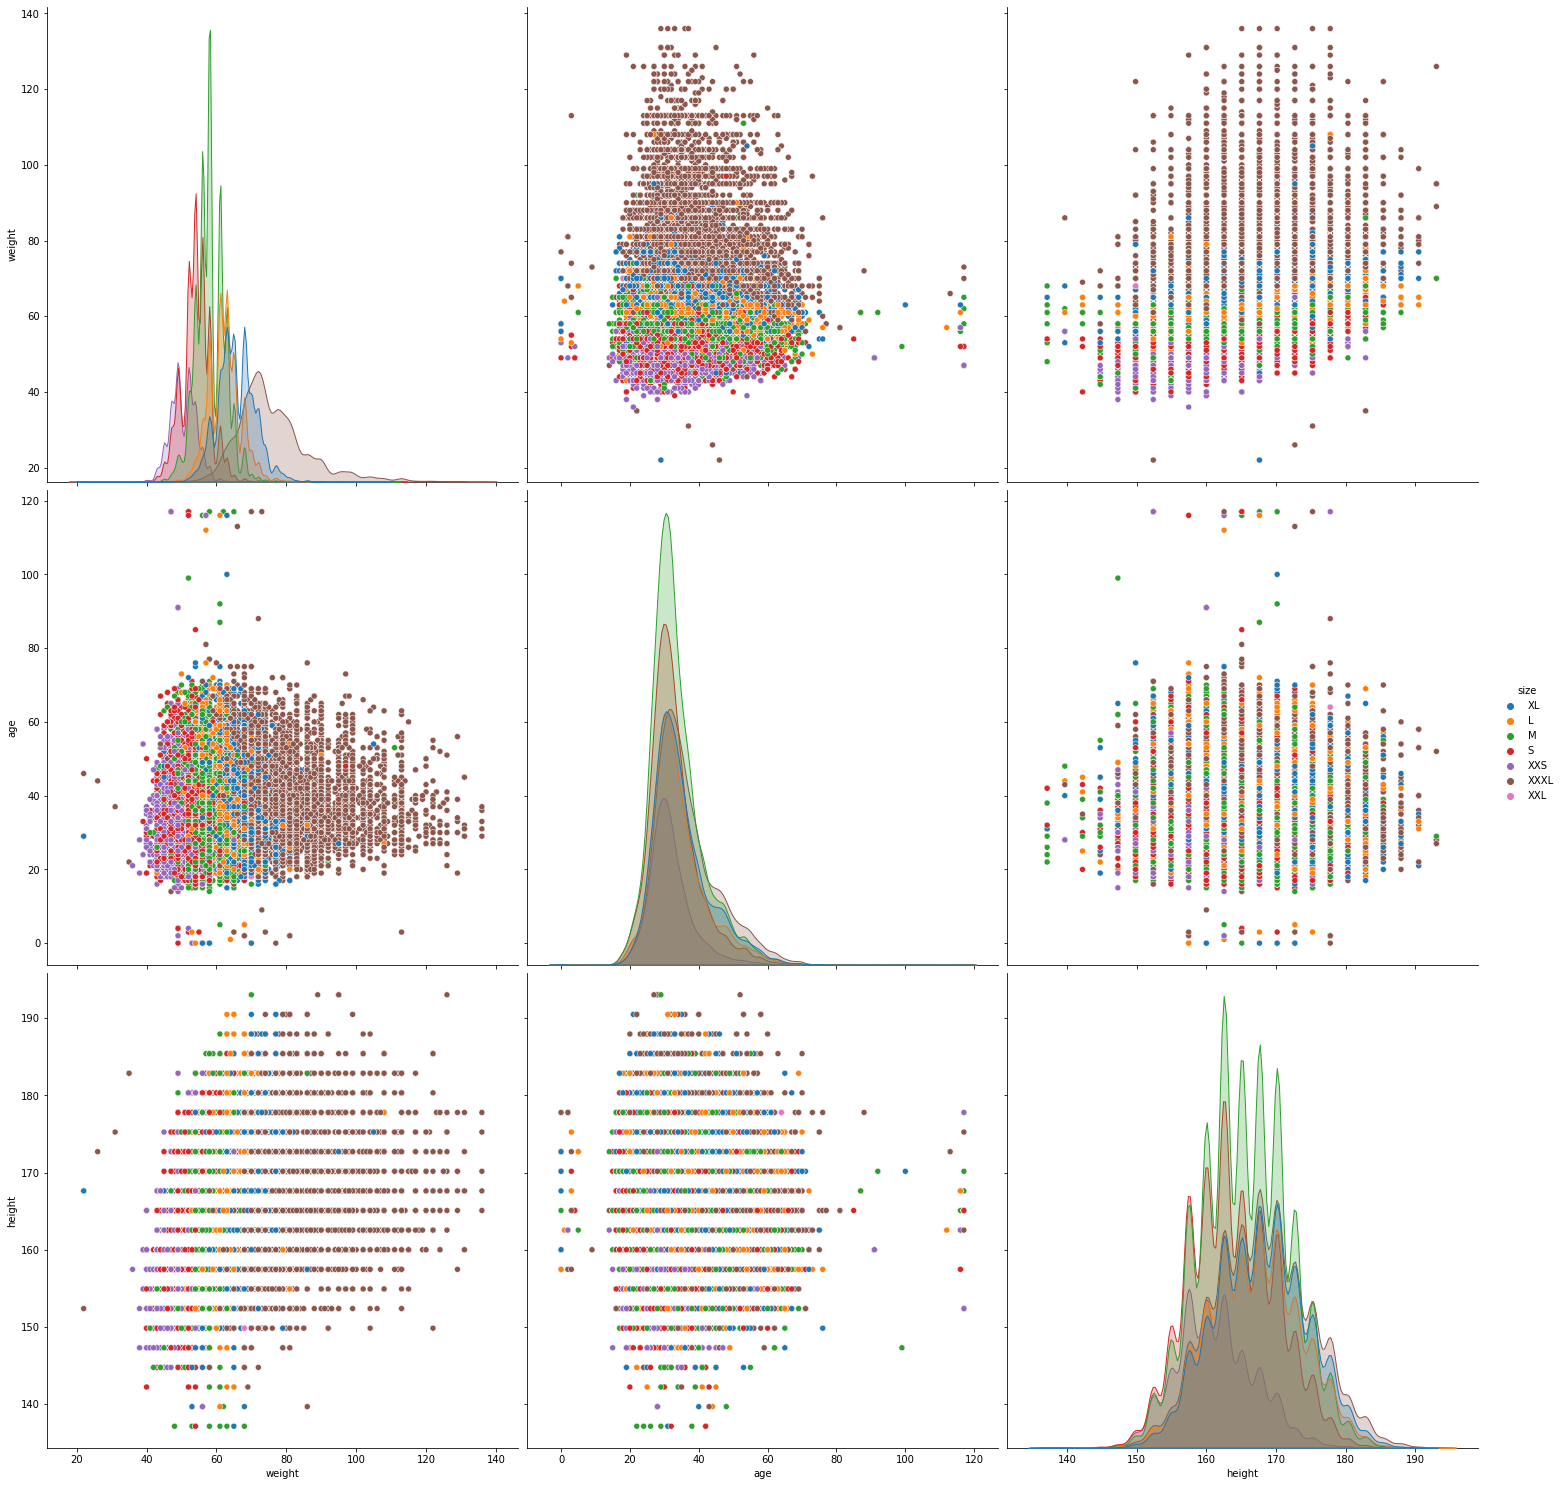

In [10]:
sns.pairplot(data=df, hue='size', height=7)
plt.show()

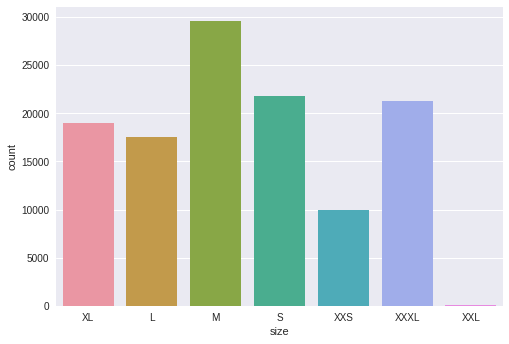

In [11]:
plt.style.use('seaborn')
sns.countplot(x=df['size'])
plt.show()

In [12]:
df.head()

weight   age  height size
0      62  28.0  172.72   XL
1      59  36.0  167.64    L
2      61  34.0  165.10    M
3      65  27.0  175.26    L
4      62  45.0  172.72    M

In [13]:
df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

# **Oulier Removal Z-score**

In [14]:
dfs = []
sizes = []
for size_type in df['size'].unique():
    print('size type:',size_type)
    sizes.append(size_type)
    ndf = df[['age','height','weight']][df['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)

size type: XL
size type: L
size type: M
size type: S
size type: XXS
size type: XXXL
size type: XXL


# **Removing Outliers**

In [15]:
for i in range(len(dfs)):
    print(sizes[i])
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

XL
L
M
S
XXS
XXXL
XXL


In [16]:
for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]

In [17]:
new_df = pd.concat(dfs)

In [18]:
new_df.head()

age    height    weight size
0  -0.833765  0.767109 -0.660874   XL
24 -0.713753  1.539084  1.556823   XL
25 -0.353718 -1.162831 -0.291257   XL
28 -0.473729 -1.934807 -1.400106   XL
34  0.126330 -0.776843  0.447975   XL

# **No Outliers**

In [19]:
new_df['age'][new_df['age']<-3]

Series([], Name: age, dtype: float64)

In [20]:
new_df['height'][new_df['height']<-3]

Series([], Name: height, dtype: float64)

In [21]:
new_df['weight'][new_df['weight']<-3]

Series([], Name: weight, dtype: float64)

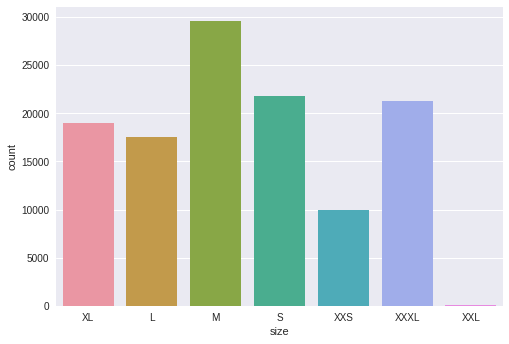

In [22]:
plt.style.use('seaborn')
sns.countplot(x=new_df['size'])
plt.show()

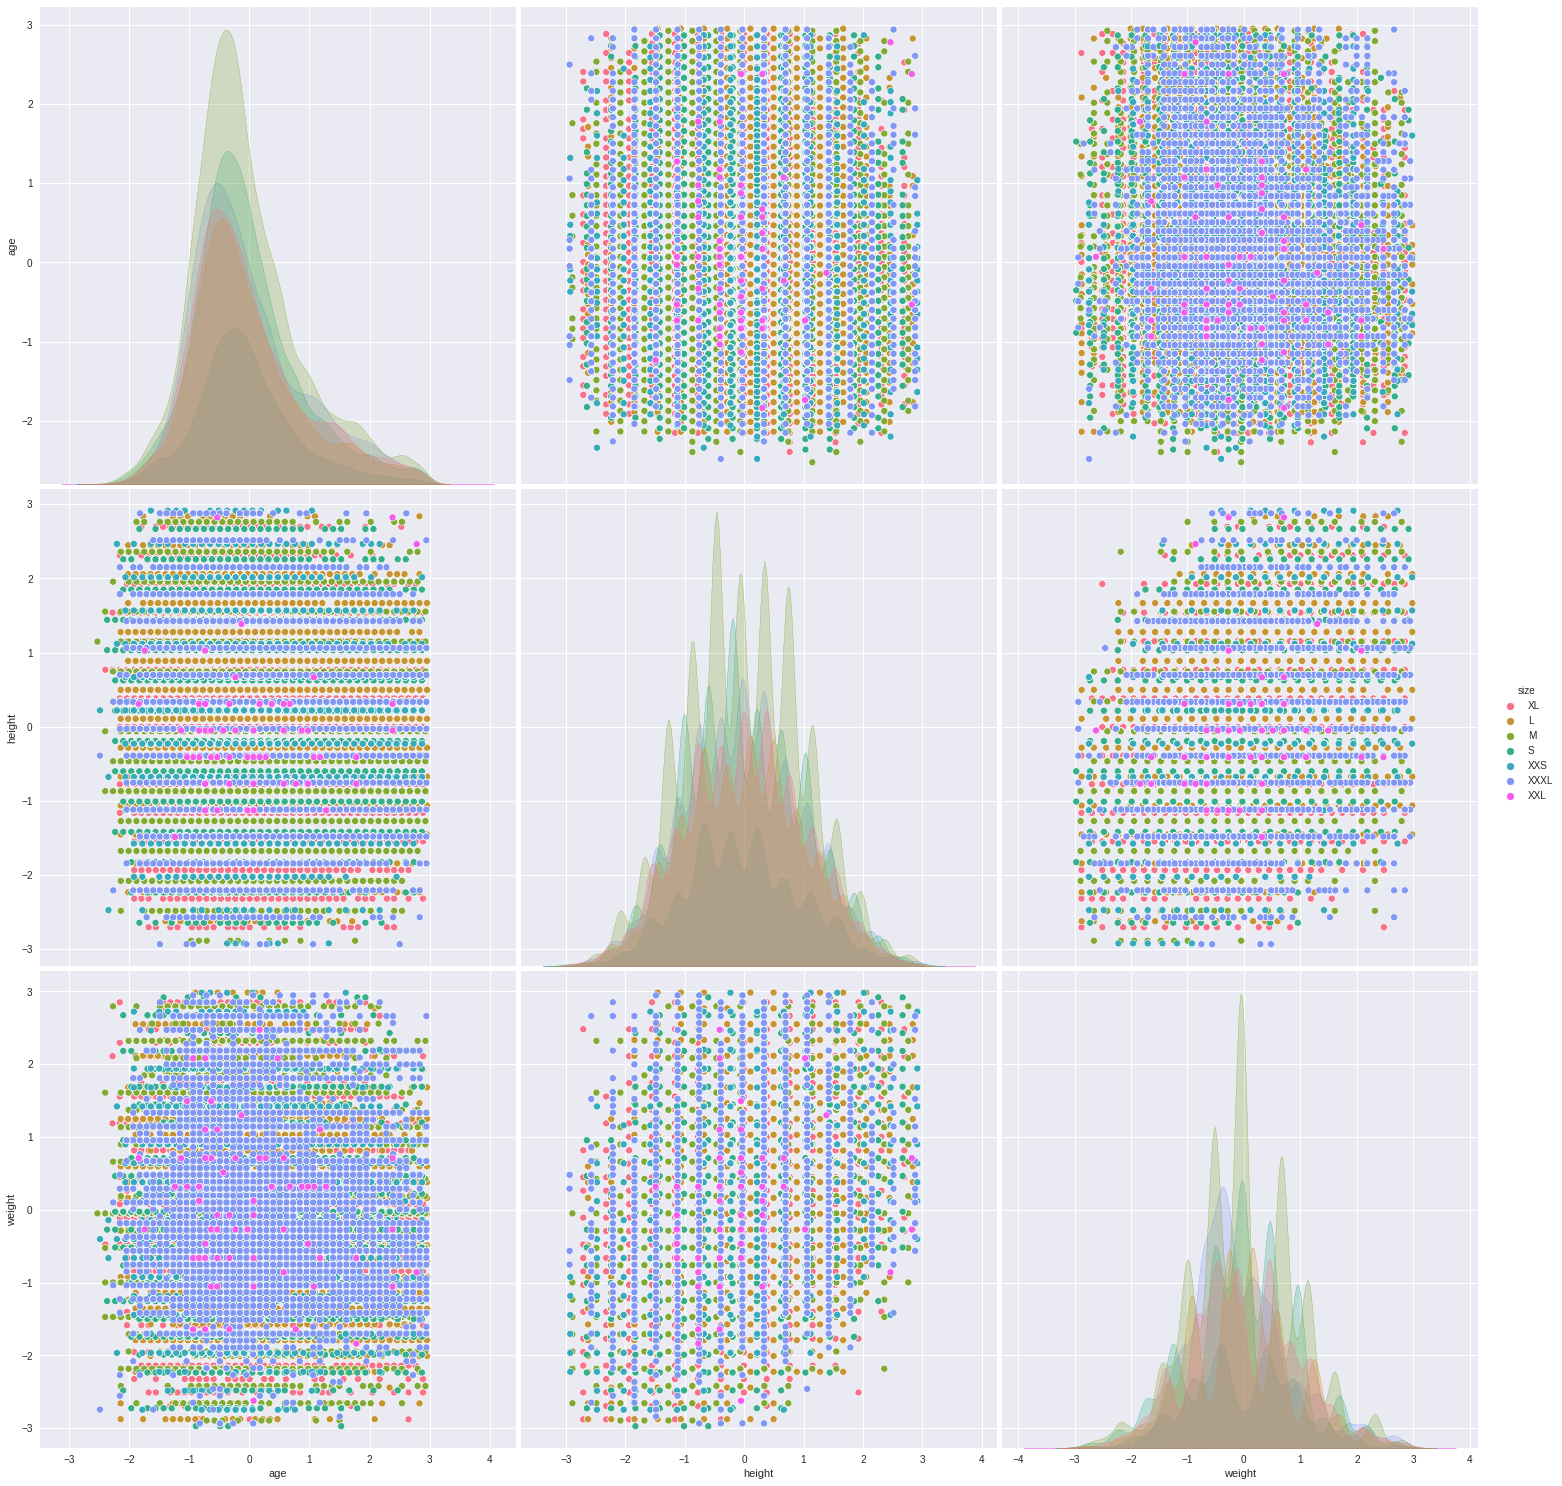

In [23]:
sns.pairplot(data=new_df, hue='size', height=7)
plt.show()

In [24]:
new_df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

# **Removing XXL size because of less count**

In [25]:
new_df2 = new_df[new_df['size'] != 'XXL'].copy()

In [26]:
new_df2.dropna(how='any', inplace=True)

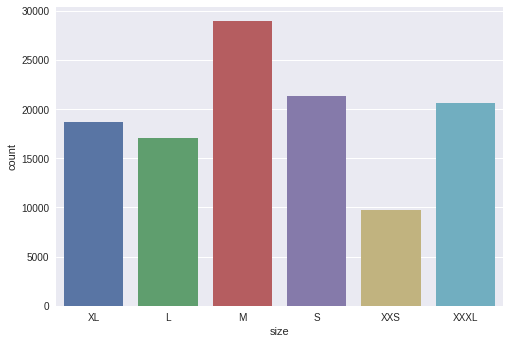

In [27]:
plt.style.use('seaborn')
sns.countplot(x=new_df2['size'])
plt.show()

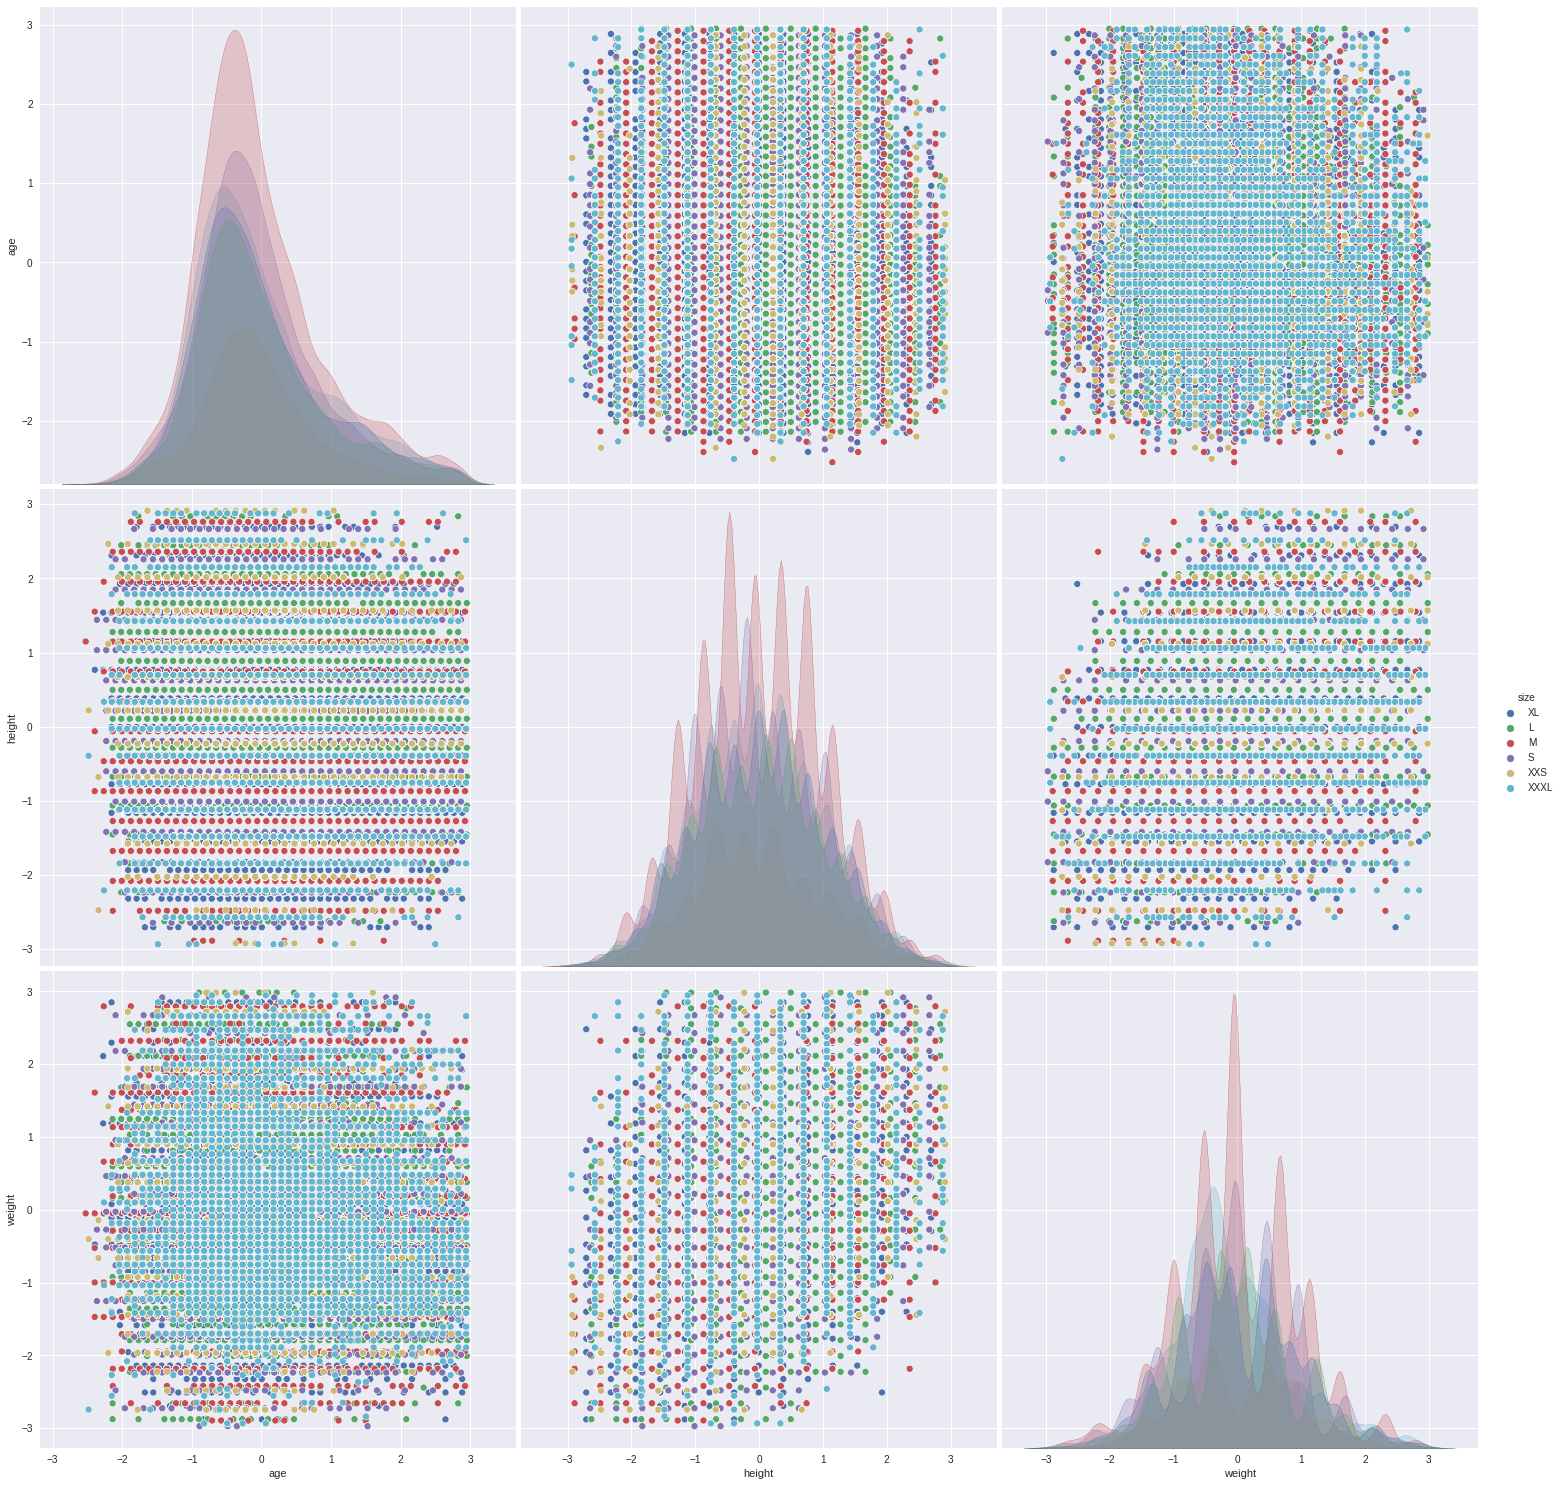

In [28]:
sns.pairplot(data=new_df2, hue='size', height=7)
plt.show()

In [29]:
new_df2['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL'], dtype=object)

In [30]:
size_code = {
    'XL':0,
    'L':1,
    'M':2,
    'S':3,
    'XXS':4,
    'XXXL':5
}
new_df2['size'].replace(size_code, inplace=True)

In [31]:
new_df2['size'].value_counts()

2    28934
3    21329
5    20654
0    18674
1    17075
4     9700
Name: size, dtype: int64

# **Splitting and training**

In [32]:
x, y = new_df2.drop('size', axis=1), new_df2['size']

In [33]:
x.shape,y.shape

((116366, 3), (116366,))

In [34]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.25)

In [35]:
x_train.shape, x_test.shape

((87274, 3), (29092, 3))

In [36]:
y_train.shape, y_test.shape

((87274,), (29092,))

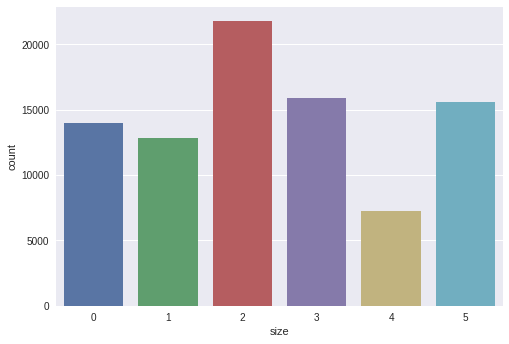

In [37]:
sns.countplot(x=y_train)
plt.show()

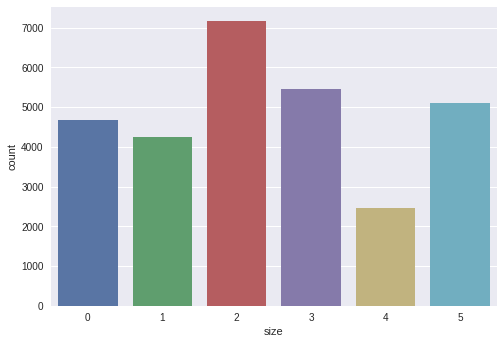

In [38]:
sns.countplot(x=y_test)
plt.show()

# **KNN Model**

In [58]:
KNN_model2 = KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights='distance')
KNN_model2.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [59]:
KNN_model2.score(x_test, y_test)

0.9382648150694349

In [60]:
KNN_model2.score(x_train, y_train)

1.0

In [63]:
y_pred = KNN_model2.predict(x_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4666
           1       0.96      0.95      0.95      4239
           2       0.94      0.97      0.95      7164
           3       0.95      0.96      0.95      5462
           4       0.94      0.90      0.92      2453
           5       0.93      0.90      0.91      5108

    accuracy                           0.94     29092
   macro avg       0.94      0.93      0.94     29092
weighted avg       0.94      0.94      0.94     29092



In [65]:
y_pred_train = KNN_model2.predict(x_train)

In [66]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14008
           1       1.00      1.00      1.00     12836
           2       1.00      1.00      1.00     21770
           3       1.00      1.00      1.00     15867
           4       1.00      1.00      1.00      7247
           5       1.00      1.00      1.00     15546

    accuracy                           1.00     87274
   macro avg       1.00      1.00      1.00     87274
weighted avg       1.00      1.00      1.00     87274

